# Image Augmentation

Image augmentation is very helpful for training a neural network because it provides a dataset with greatly varied features. This will help the neural network better classify less-recognizable images.

----

### Imports

In [9]:
# Used for retrieving random images.
import os
import random

# Used to plot images and graphs
import matplotlib.pyplot as plt
import matplotlib.image as mp_img

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import RMSprop

base_dir = 'dataset'
train_dir = os.path.join(base_dir, 'training_set')
validation_dir = os.path.join(base_dir, 'test_set')
train_dir_cats = os.path.join(train_dir, 'cats')
train_dir_dogs = os.path.join(train_dir, 'dogs')

----

### Visualizing the Dataset

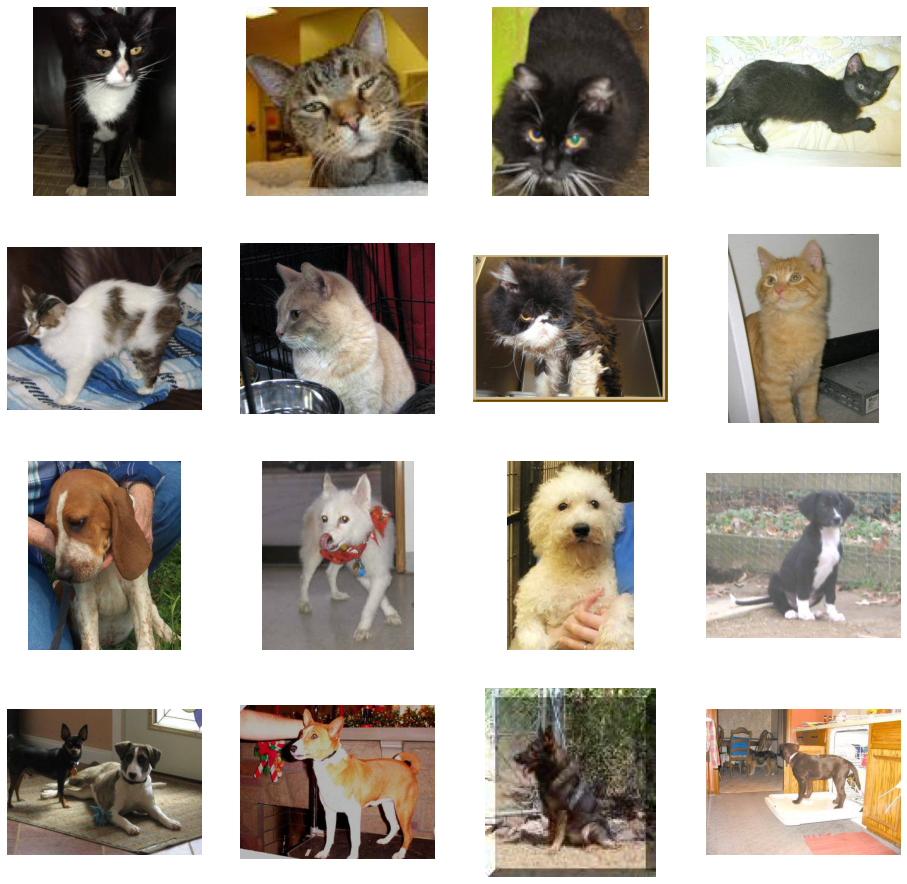

In [2]:
ROWS = 4
COLUMNS = 4

figure = plt.gcf()
figure.set_size_inches((ROWS * 4), (COLUMNS * 4))

cat_pictures = [os.path.join(train_dir_cats, filename) for filename in os.listdir(train_dir_cats)]
dog_pictures = [os.path.join(train_dir_dogs, filename) for filename in os.listdir(train_dir_dogs)]

index = 1
for img_path in random.choices(cat_pictures, k = 8):
    subplot = plt.subplot(ROWS, COLUMNS, index)
    subplot.axis('Off')
    image = mp_img.imread(img_path)
    plt.imshow(image)
    index += 1
    
for img_path in random.choices(dog_pictures, k = 8):
    subplot = plt.subplot(ROWS, COLUMNS, index)
    subplot.axis('Off')
    image = mp_img.imread(img_path)
    plt.imshow(image)
    index += 1
    
plt.show()

----

### Creating the Neural Network

**Binary Cross Entropy:** Binary cross entropy is the traditional cross entropy formula adjusted to fit a single output label representing two, and only two, classes.

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

model.compile(optimizer = RMSprop(lr = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

----

### Image Preprocessing & Augementation

In [4]:
training_datagen = ImageDataGenerator(
    # Pixel value normalization.
    rescale = 1 / 255,
    # The maximum degree of rotation. 
    rotation_range = 40,
    # Limits on how much the image can be transformed.
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    # Randomly flips images.
    horizontal_flip = True,
    # Fills the missing pixel values with the nearest existing pixel values.
    fill_mode = 'nearest'
)

# The validation dataset shouldn't be augmented. It's purely for testing.
validation_datagen = ImageDataGenerator(rescale = 1 / 255)

training_generator = training_datagen.flow_from_directory(
    train_dir,
    # Images will be resized to have a standardized size.
    target_size = (150, 150),
    # How many images will be given to the model per iteration of training.
    batch_size = 20,
    # 'binary' for two classes, 'categorical' for more.
    class_mode = 'binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


----

### Training & Evaluating the Neural Network

In [5]:
results = model.fit(
    training_generator,
    steps_per_epoch = 400,
    validation_data = validation_generator,
    validation_steps = 100,
    epochs = 10,
    verbose = 1
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 400 steps, validate for 100 steps
Epoch 1/10
400/400 [==============================] - 57s 143ms/step - loss: 0.6908 - accuracy: 0.5875 - val_loss: 0.6104 - val_accuracy: 0.6720
Epoch 2/10
400/400 [==============================] - 57s 141ms/step - loss: 0.6277 - accuracy: 0.6557 - val_loss: 0.5360 - val_accuracy: 0.7410
Epoch 3/10
400/400 [==============================] - 56s 141ms/step - loss: 0.6087 - accuracy: 0.6737 - val_loss: 0.5359 - val_accuracy: 0.7320
Epoch 4/10
400/400 [==============================] - 58s 144ms/step - loss: 0.5887 - accuracy: 0.6890 - val_loss: 0.6015 - val_accuracy: 0.6840
Epoch 5/10
400/400 [==============================] - 56s 140ms/step - loss: 0.5758 - accuracy: 0.7023 - val_loss: 0.5374 - val_accuracy: 0.7190
Epoch 6/10
400/400 [==============================] - 56s 140ms/step - loss: 0.5664 - accuracy: 0.7097 - val_loss: 0.4997 - val_accuracy: 0.7560
Epoch 7/10
400/400 [================

----

### Plotting Model Statistics

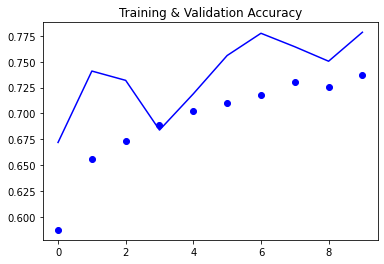

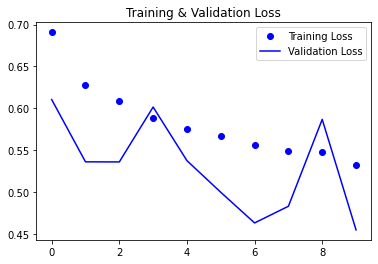

In [7]:
accuracy = results.history['accuracy']
val_accuracy = results.history['val_accuracy']
loss = results.history['loss']
val_loss = results.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training & Validation Accuracy')
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training & Validation Loss')
plt.legend()

plt.show()

----

### Classifying Images

In [83]:
cat_img = load_img(random.choice(cat_pictures), target_size = (150, 150))
dog_img = load_img(random.choice(cat_pictures), target_size = (150, 150))

img_array = np.array([img_to_array(cat_img), img_to_array(dog_img)])

classes = model.predict(img_array)
print('Cat' if classes[0] < 0.5 else 'Dog')
print('Cat' if classes[1] < 0.5 else 'Dog')

Cat
Dog
